# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#test example to check format
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()

print(response)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.53, 'feels_like': 1.9, 'temp_min': 5.56, 'temp_max': 7.78, 'pressure': 1016, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1584154924, 'sys': {'type': 1, 'id': 1417, 'country': 'GB', 'sunrise': 1584166570, 'sunset': 1584208992}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

cityApi = []
cloudinessApi = []
countryApi = []
dateApi = []
humidityApi = []
latApi = []
lngApi = []
maxTempApi = []
windSpeedApi = [] 
RECORD = 0

print("Beginning Data Retrieval")  
print("-----------------------------")

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for CT in cities:
 
    try:
        response = requests.get(query_url + CT).json()
        cityApi.append(response["name"])
        cloudinessApi.append(response["clouds"]["all"])
        countryApi.append(response["sys"]["country"])
        dateApi.append(response["dt"])
        humidityApi.append(response["main"]["humidity"])
        latApi.append(response["coord"]["lat"])
        lngApi.append(response["coord"]["lon"])
        maxTempApi.append(response["main"]["temp_max"])
        windSpeedApi.append(response["wind"]["speed"])
        RECORD = RECORD +1
        cityName = response["name"]
        cityID = response["id"]
        print(f"Checked {cityName}, city id {cityID}, record count {RECORD}")
        
    except Exception as exc:
        print(f"City not found")
        
    
    time.sleep(1)


Beginning Data Retrieval
-----------------------------
Checked Chokurdakh, city id 2126123, record count 1
Checked Lebu, city id 3883457, record count 2
Checked Guangyuan, city id 1806466, record count 3
Checked Yellowknife, city id 6185377, record count 4
Checked Buriti Alegre, city id 3468745, record count 5
Checked Mount Hagen, city id 2090409, record count 6
Checked George Town, city id 1735106, record count 7
Checked Kapaa, city id 5848280, record count 8
Checked Ishigaki, city id 1861416, record count 9
Checked Reconquista, city id 3429594, record count 10
Checked Vaini, city id 4032243, record count 11
Checked Dongargaon, city id 1272400, record count 12
Checked Husavik, city id 2629833, record count 13
Checked Puerto Ayora, city id 3652764, record count 14
Checked Bluff, city id 2206939, record count 15
Checked San Cristobal, city id 3628473, record count 16
Checked Caravelas, city id 3466980, record count 17
Checked Iskateley, city id 866062, record count 18
Checked Punta Aren

Checked Wāshīm, city id 1252908, record count 153
Checked Clyde River, city id 5924351, record count 154
Checked Nikolskoye, city id 546105, record count 155
Checked Belaya Gora, city id 2126785, record count 156
City not found
Checked Mbala, city id 176146, record count 157
Checked Eišiškės, city id 599614, record count 158
City not found
Checked Canary Islands, city id 2593110, record count 159
Checked Tasiilaq, city id 3424607, record count 160
Checked Belize, city id 3582678, record count 161
Checked Cherskiy, city id 2126199, record count 162
Checked Kavieng, city id 2094342, record count 163
Checked Royan, city id 2982343, record count 164
Checked Shitanjing, city id 1794971, record count 165
Checked Lorengau, city id 2092164, record count 166
Checked Zhigansk, city id 2012530, record count 167
Checked Burē, city id 341397, record count 168
Checked Edmundston, city id 6545023, record count 169
City not found
Checked Souillac, city id 933995, record count 170
Checked Nianzishan, c

City not found
Checked Usinsk, city id 863061, record count 303
Checked Iberia, city id 4328254, record count 304
Checked Qaqortoq, city id 3420846, record count 305
Checked Saint George, city id 5546220, record count 306
Checked Madaoua, city id 2441530, record count 307
Checked Dauphin, city id 5935341, record count 308
Checked Biak, city id 1637001, record count 309
Checked Novyy Urgal, city id 2047258, record count 310
Checked Flinders, city id 6255012, record count 311
Checked Klaksvík, city id 2618795, record count 312
Checked Calama, city id 3897347, record count 313
Checked Dodge City, city id 5445298, record count 314
Checked Mirny, city id 2019951, record count 315
Checked Tura, city id 1254046, record count 316
Checked Kuching, city id 1735634, record count 317
Checked Tuatapere, city id 2180815, record count 318
Checked Martyush, city id 1499288, record count 319
Checked Chara, city id 2025630, record count 320
Checked Cherat Cantonement, city id 1181327, record count 321
C

Checked North Shore, city id 2185964, record count 457
Checked Dunn, city id 5251040, record count 458
Checked Vilhena, city id 3924679, record count 459
Checked Carutapera, city id 3402648, record count 460
Checked Zhigalovo, city id 2012532, record count 461
Checked Arman', city id 2127060, record count 462
Checked Yuanping, city id 1786060, record count 463
Checked Karaton, city id 1630058, record count 464
Checked Newcastleton, city id 2644927, record count 465
Checked Kiryat Gat, city id 293842, record count 466
Checked Kirakira, city id 2178753, record count 467
Checked Görele, city id 746565, record count 468
Checked Umm Kaddadah, city id 364933, record count 469
Checked Hvolsvollur, city id 3415720, record count 470
Checked Sistranda, city id 3139597, record count 471
Checked Krasnosel'kup, city id 1502073, record count 472
Checked Aklavik, city id 5882953, record count 473
Checked Saint-Paul, city id 935221, record count 474
Checked Bonfim, city id 3405215, record count 475
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dic = {
    
    "City": cityApi,
    "Cloudiness":cloudinessApi, 
    "Country":countryApi,
    "Date":dateApi, 
    "Humidity": humidityApi,
    "Lat":latApi, 
    "Lng":lngApi, 
    "Max Temp": maxTempApi,
    "Wind Speed":windSpeedApi
}

weather_df = pd.DataFrame(weather_dic)
weather_df.to_csv(output_data_file)

weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chokurdakh,100,RU,1584155551,96,70.63,147.92,-15.59,9.22
1,Lebu,0,CL,1584155552,94,-37.62,-73.65,49.59,3.98
2,Guangyuan,30,CN,1584155479,57,32.44,105.82,57.99,2.39
3,Yellowknife,5,CA,1584155554,62,62.46,-114.35,-14.80,6.93
4,Buriti Alegre,0,BR,1584155555,94,-18.14,-49.04,68.07,2.28
...,...,...,...,...,...,...,...,...,...
552,Madimba,100,TZ,1584156197,94,-10.40,40.33,76.73,6.87
553,Richards Bay,67,ZA,1584156198,84,-28.78,32.04,77.09,16.53
554,Tezu,60,IN,1584156199,28,27.92,96.17,79.48,2.80
555,Garissa,66,KE,1584156200,79,-0.45,39.64,79.70,8.32


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

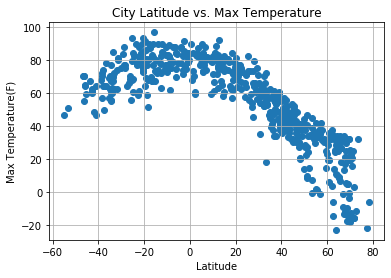

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("../output_data/fig1.png")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

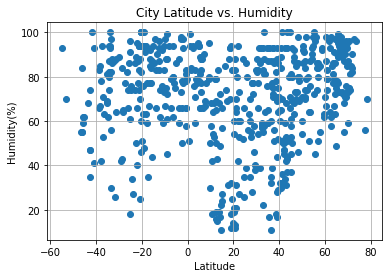

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/fig2.png")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

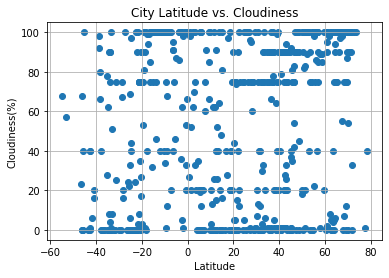

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("../output_data/fig3.png")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

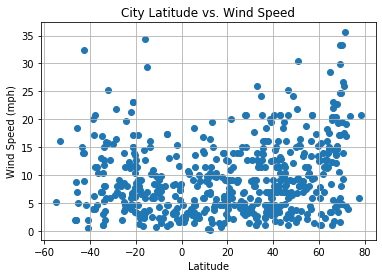

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/fig4.png")
plt.grid(True)
plt.show()

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
def north():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,20),fontsize=15,color="red")
    
def south():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-20,50),fontsize=15,color="red")

In [30]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_df = weather_df[weather_df['Lat'] >= 0]
south_weather_df = weather_df[weather_df['Lat'] <0]


south_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Lebu,0,CL,1584155552,94,-37.62,-73.65,49.59,3.98
4,Buriti Alegre,0,BR,1584155555,94,-18.14,-49.04,68.07,2.28
5,Mount Hagen,75,PG,1584155557,77,-5.86,144.23,69.80,4.70
9,Reconquista,0,AR,1584155561,42,-29.15,-59.65,83.84,6.35
10,Vaini,75,TO,1584155562,83,-21.20,-175.20,80.60,14.99


In [31]:
north_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chokurdakh,100,RU,1584155551,96,70.63,147.92,-15.59,9.22
2,Guangyuan,30,CN,1584155479,57,32.44,105.82,57.99,2.39
3,Yellowknife,5,CA,1584155554,62,62.46,-114.35,-14.80,6.93
6,George Town,20,MY,1584155372,66,5.41,100.34,89.60,4.70
7,Kapaa,90,US,1584155559,60,22.08,-159.32,77.00,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

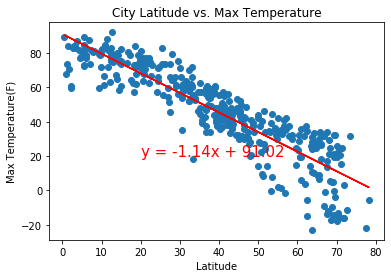

In [32]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Max Temp"]
north()

plt.show()

#explanation: The higher the Latitude, the lower the max temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

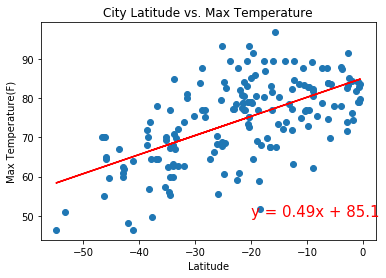

In [33]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Max Temp"]
south()

plt.show()
# #explanation: The lower the Latitude, the lower the max temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

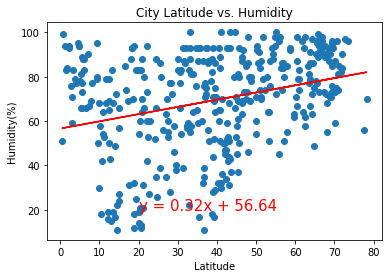

In [34]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Humidity"]
north()

plt.show()
#the data points do not appear to be conclusive, but most of the cities appear to be quite humid

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

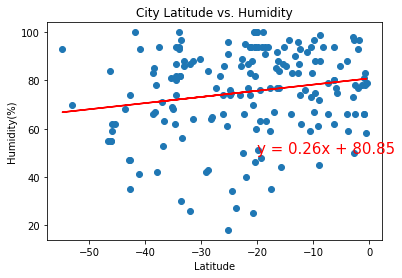

In [35]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Humidity"]
south()

plt.show()
#the data points do not appear to be conclusive, but most of the cities appear to be quite humid

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

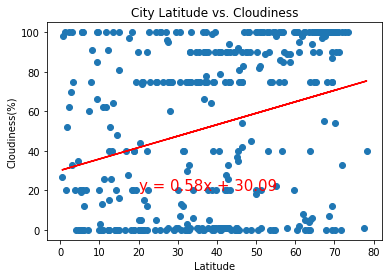

In [40]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Cloudiness"]
north()

plt.show()
#the data points do not appear to be conclusive

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

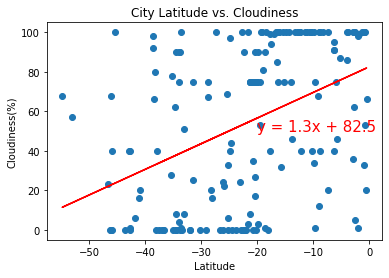

In [41]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Cloudiness"]
south()

plt.show()
#the data points do not appear to be conclusive

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

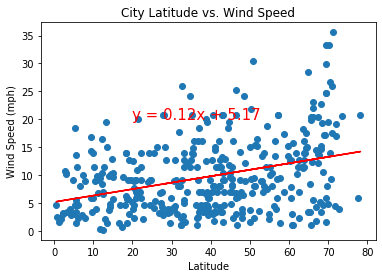

In [42]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Wind Speed"]
north()

plt.show()
#windspeed is generally under 20mph

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

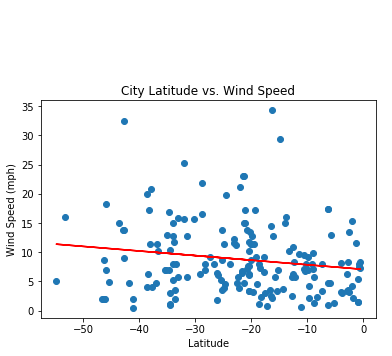

In [43]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Wind Speed"]
south()

plt.show()
#windspeed is generally under 20mph